# Names, IDs
## Ahmad Samir Abdulmoniem 46-4022
## Youssef Ibrahim Samir 46-3501
## Nouran Walid 60-1150

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from Classification_Project_DE_Module import DE_fn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

### Here I am checking if the output csv file from the DE code exists, in order not to run it again

In [2]:
if os.path.exists('./2018_Accidents_UK_Final.csv'):
    x = np.nan
else:
    DE_fn()

### Here I import the output csv file from the DE script, after preforming the preprocessing, encoding, etc...

In [3]:
df = pd.read_csv('./2018_Accidents_UK_Final.csv', low_memory=False)

### I shuffle all the data before spliting, to avoid the bais of the model towrads specifc data, and to get random samples from the whole data

In [4]:
shuffled_df = shuffle(df)

### Define what is the feature that I will use in the models, to be used to predict the accident severity

In [5]:
df_copy = shuffled_df[['number_of_vehicles','number_of_casualties','day_of_week_0','day_of_week_1','day_of_week_2',
        'first_road_class_0','first_road_class_1','first_road_class_2','road_type_0','road_type_1',
        'road_type_2','junction_detail_0','junction_detail_1','junction_detail_2','junction_detail_3',
        'junction_control_0','junction_control_1','junction_control_2','pedestrian_crossing_human_control_0',
        'pedestrian_crossing_human_control_1','pedestrian_crossing_physical_facilities_0',
        'pedestrian_crossing_physical_facilities_1','pedestrian_crossing_physical_facilities_2','light_conditions_0',
        'light_conditions_1','light_conditions_2','weather_conditions_0','weather_conditions_1','weather_conditions_2',
        'road_surface_conditions_0','road_surface_conditions_1','trunk_road_flag_0','trunk_road_flag_1',
        'week_number_0', 'week_number_1', 'week_number_2','week_number_3', 'week_number_4',
        'week_number_5','special_conditions_at_site_None','special_conditions_at_site_Rare',
        'carriageway_hazards_None', 'carriageway_hazards_Rare','urban_or_rural_area_Rural',
        'urban_or_rural_area_Urban','week_end', 'time_in_mins']]

In [6]:
X = df_copy
y = shuffled_df['accident_severity']

In [7]:
accuray_arr = []

### Spliting the data into, 80% train, 20% test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Applying the KNN technique on the data, and getting the accuracy, and the confusion matrix

In [9]:
k = round(math.sqrt(len(df_copy)))
knn = KNeighborsClassifier(n_neighbors=k)

cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuray_arr.append(accuracy)
print("Accuracy:", accuracy)

Cross-Validation Scores: [0.79919679 0.79919679 0.79919679 0.79919679 0.79919679 0.79909381
 0.79909381 0.79917611 0.79917611 0.79917611]
Mean CV Accuracy: 0.7991699879345208
Accuracy: 0.7986159739671294


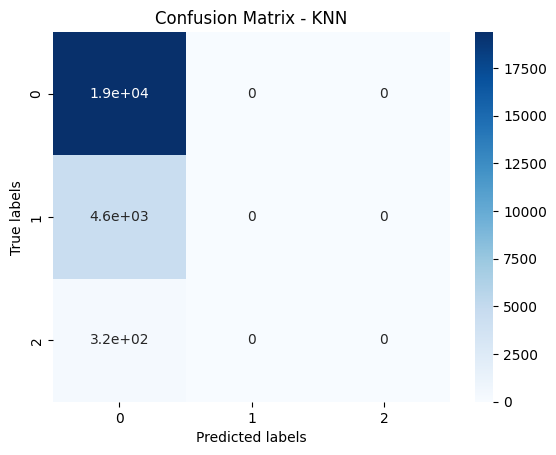

In [10]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Applying the Naive Bayes technique on the data, and getting the accuracy, and the confusion matrix

In [11]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuray_arr.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.44877867940849364


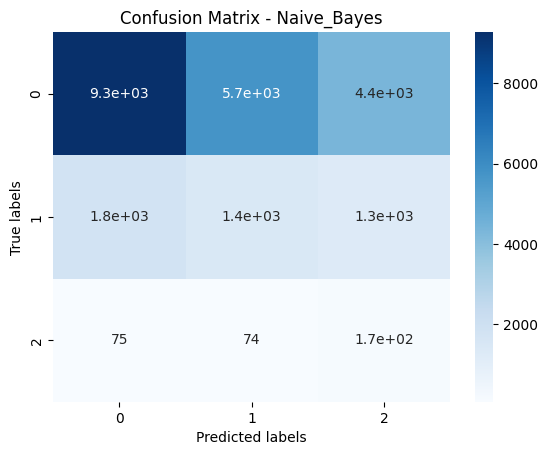

In [12]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Naive_Bayes")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Applying the Logistic Regression technique on the data, and getting the accuracy, and the confusion matrix

In [13]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuray_arr.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.7986983564690859


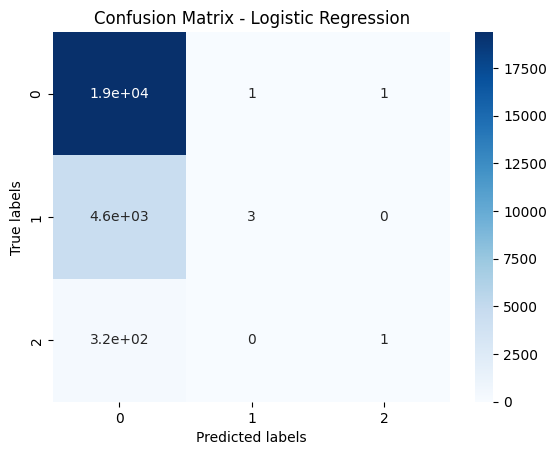

In [14]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Applying the NN technique on the data, and getting the accuracy, and the confusion matrix

In [15]:
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

model = tf.keras.models.Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(num_classes, activation='softmax')
])

learning_rate = 0.0001

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=1000, verbose=1)

_, accuracy = model.evaluate(X_test, y_test, verbose=1)
accuray_arr.append(accuracy)
print("Accuracy:", accuracy)

Epoch 1/15
98/98 [==============================] - 1s 4ms/step - loss: 3.8278 - accuracy: 0.7432
Epoch 2/15
98/98 [==============================] - 0s 3ms/step - loss: 3.2550 - accuracy: 0.7992
Epoch 3/15
98/98 [==============================] - 0s 4ms/step - loss: 2.8657 - accuracy: 0.7992
Epoch 4/15
98/98 [==============================] - 0s 3ms/step - loss: 2.5282 - accuracy: 0.7992
Epoch 5/15
98/98 [==============================] - 0s 3ms/step - loss: 2.2344 - accuracy: 0.7992
Epoch 6/15
98/98 [==============================] - 0s 3ms/step - loss: 1.9794 - accuracy: 0.7992
Epoch 7/15
98/98 [==============================] - 0s 4ms/step - loss: 1.7591 - accuracy: 0.7992
Epoch 8/15
98/98 [==============================] - 0s 4ms/step - loss: 1.5694 - accuracy: 0.7992
Epoch 9/15
98/98 [==============================] - 0s 4ms/step - loss: 1.4069 - accuracy: 0.7992
Epoch 10/15
98/98 [==============================] - 0s 3ms/step - loss: 1.2682 - accuracy: 0.7992
Epoch 11/15
98/98 [

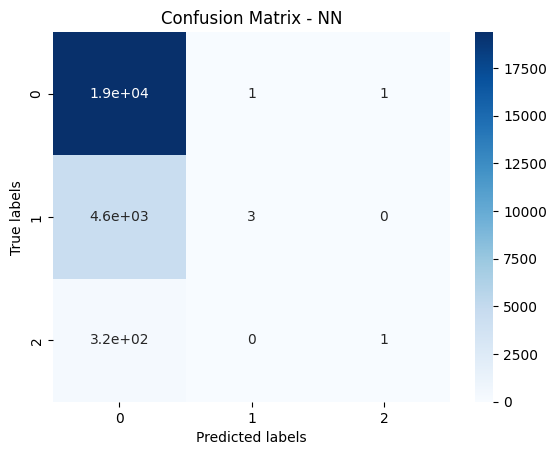

In [16]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - NN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Finally here is a graph that comapres between all the models accuracy

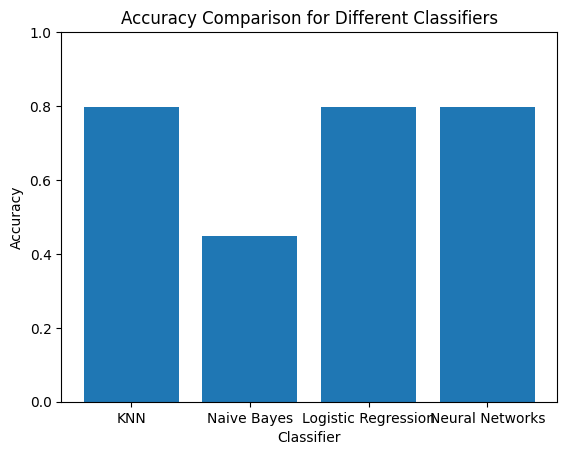

In [17]:
classifiers = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Neural Networks']

plt.bar(classifiers, accuray_arr)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Classifiers')
plt.ylim([0.0, 1.0])
plt.show()